In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from utils import download_kaggle_dataset, metrics

# Linear Regression

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression as LR
from linear_regression import LinearRegression, mse

n_samples, n_features = 1090, 18

X, y = make_regression(n_samples=n_samples, 
                       n_features=n_features,
                       n_informative=5, 
                       noise=6, 
                       random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

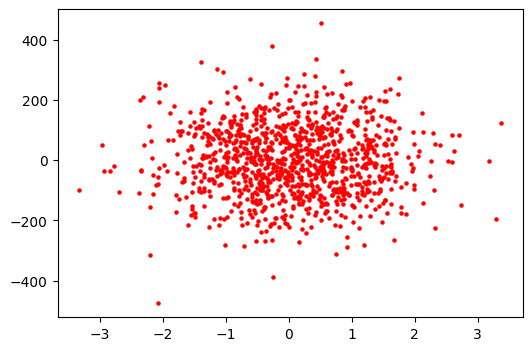

In [31]:
fig = plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], y, color="red", marker="o", s=5)
plt.show()

In [32]:
model = LinearRegression(lr=0.01)
skmodel = LR()

model.fit(X_train, y_train)
skmodel.fit(X_train, y_train)

y_pred1 = model.predict(X_test)
y_pred2 = skmodel.predict(X_test)

print(mse(y_pred1, y_test))
print(mse(y_pred2, y_test))

41.822783323664375
41.799469128017684


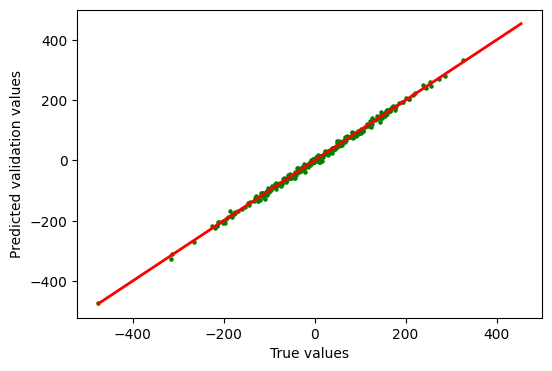

In [33]:
fig = plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred1, color="green", s=5)
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linewidth=2)
plt.xlabel("True values")
plt.ylabel("Predicted validation values")
plt.show()

# Gaussian Naive Bayes

In [ ]:
from sklearn.datasets import load_iris, load_wine
from sklearn.naive_bayes import GaussianNB as GNB
from gaussian_naive_bayes import GaussianNB

In [35]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
skmodel = GNB()


model.fit(X_train, y_train)
skmodel.fit(X_train, y_train)

y_pred1 = model.predict(X_test)
y_pred2 = skmodel.predict(X_test)

In [36]:
metrics(y_pred1, y_test, iris.target_names)

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
metrics(y_pred2, y_test, iris.target_names)

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



# Multinomial Naive Bayes

In [ ]:
from multinomial_naive_bayes import MultinomialNB, preprocess_text
from sklearn.naive_bayes import MultinomialNB as MNB 

In [ ]:
dataset_files = download_kaggle_dataset("purusinghvi/email-spam-classification-dataset")

df = pd.read_csv(dataset_files[0])
df["tokens"] = df["text"].apply(preprocess_text)

X_train, X_test, y_train, y_test = train_test_split(df["tokens"].tolist(), df["label"].tolist(), test_size=0.25, random_state=1)

In [41]:
model = MultinomialNB()
# skmodel = MNB()

model.fit(X_train, y_train)
# skmodel.fit(X_train, y_train)

y_pred1 = model.predict(X_test)
# y_pred2 = skmodel.predict(X_test)

In [42]:
metrics(y_pred1, y_test)

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9903
           1       0.98      0.93      0.95     10959

    accuracy                           0.95     20862
   macro avg       0.95      0.95      0.95     20862
weighted avg       0.95      0.95      0.95     20862

